Import all libraries

In [7]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
# %matplotlib inline

In [8]:
# Reading the train and test csv files
train = pd.read_csv('C:/Users/elfyl/Documents/bioinformatics_and_systems_biology/machine_learning/beginner/train.csv')
test = pd.read_csv('C:/Users/elfyl/Documents/bioinformatics_and_systems_biology/machine_learning/beginner/test.csv')

print(train.head())

    Image_id           Animal
0  Img-1.jpg     hippopotamus
1  Img-2.jpg         squirrel
2  Img-3.jpg     grizzly+bear
3  Img-4.jpg               ox
4  Img-5.jpg  german+shepherd


In [9]:
# Number of images in the training and the test datasets.
print('There are {} images in the train dataset.'.format(train.shape[0]))
print('There are {} images in the test datasets.'.format(test.shape[0]))

There are 13000 images in the train dataset.
There are 6000 images in the test datasets.


In [10]:
# Number of unique animals in the datasets
print('There are {} unique animals in the dataset.'.format(train.Animal.unique().shape[0]))
print('The dataset contain images of the following animals:\n\n', train.Animal.unique())

There are 30 unique animals in the dataset.
The dataset contain images of the following animals:

 ['hippopotamus' 'squirrel' 'grizzly+bear' 'ox' 'german+shepherd' 'buffalo'
 'otter' 'bobcat' 'wolf' 'persian+cat' 'collie' 'antelope' 'seal'
 'dalmatian' 'siamese+cat' 'moose' 'horse' 'killer+whale' 'mouse' 'walrus'
 'beaver' 'rhinoceros' 'chimpanzee' 'weasel' 'spider+monkey' 'raccoon'
 'rat' 'chihuahua' 'mole' 'bat']


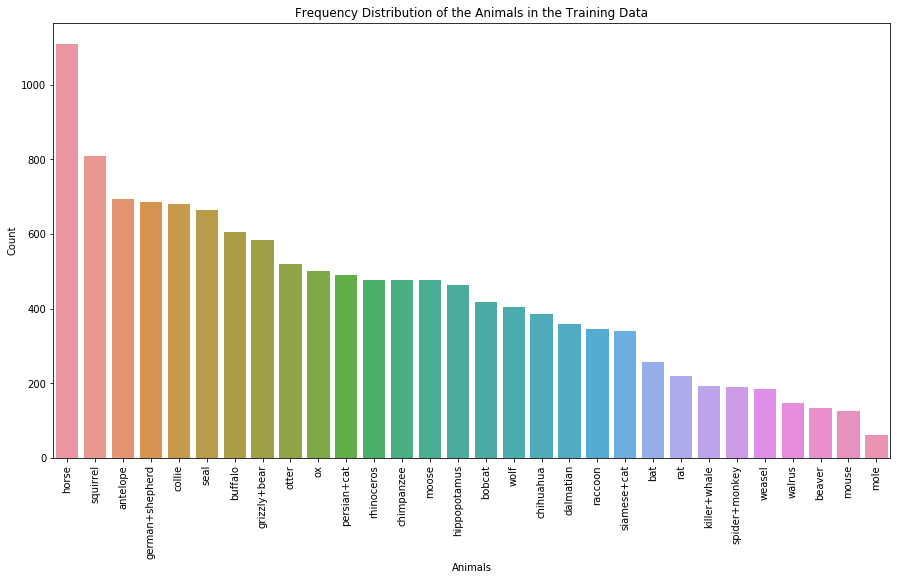

In [11]:
animal_count = pd.value_counts(train.Animal)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x=animal_count.index, y=animal_count.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Frequency Distribution of the Animals in the Training Data')
ax.set(xlabel='Animals', ylabel='Count')
plt.show()

In [12]:
### Checking for any null values in the labels
labels = train.Animal
labels.isnull().any()

False

In [13]:
### Train and Test image folder paths
TRAIN_PATH = 'train/train/'
TEST_PATH = 'test/test/'

In [20]:
### Importing Python Image Library and Opencv library
from PIL import Image
import cv2

In [21]:
print('Animal: ', train.Animal[10])
photo = Image.open(TRAIN_PATH + train.Image_id[10])
photo.show()

Animal:  collie


In [22]:
img = cv2.imread(TRAIN_PATH + train.Image_id[10])
print(img)

[[[ 57  79 107]
  [ 49  73 103]
  [ 49  74 108]
  ...
  [ 26  46  77]
  [ 48  93 126]
  [100 138 168]]

 [[ 48  70  98]
  [ 52  73 104]
  [ 57  78 110]
  ...
  [ 16  34  63]
  [ 67 112 139]
  [116 157 180]]

 [[ 49  70  98]
  [ 57  77 108]
  [ 62  82 113]
  ...
  [ 33  49  78]
  [ 48  91 118]
  [ 85 126 149]]

 ...

 [[ 67  95 136]
  [ 64  96 132]
  [ 74 109 143]
  ...
  [ 92 137 175]
  [112 155 188]
  [106 149 176]]

 [[ 72 104 145]
  [104 141 175]
  [105 145 174]
  ...
  [100 148 182]
  [112 156 187]
  [110 149 177]]

 [[ 56  89 135]
  [ 73 108 152]
  [ 65  94 138]
  ...
  [ 99 143 180]
  [111 156 190]
  [110 151 184]]]


In [23]:
print(img.shape)

(681, 1024, 3)


In [24]:
### Displaying the image dimensions of the first five images in the training dataset.
sample = train.head()
for idx in sample.Image_id:
    img = cv2.imread(TRAIN_PATH + idx)
    print('{} : {}'.format(idx, img.shape))

Img-1.jpg : (1024, 576, 3)
Img-2.jpg : (771, 1024, 3)
Img-3.jpg : (683, 1024, 3)
Img-4.jpg : (681, 1024, 3)
Img-5.jpg : (500, 332, 3)


In [25]:
### Creating a function to resize the images in the training data.
from tqdm import tqdm
def read_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    return img

In [26]:
# temp = train.sample(frac=0.3)
# train = temp.reset_index(drop=True)

In [27]:
# Test resized on one photo -- works
first_photo = 'Img-1.jpg'
resized_first_photo = read_img(TEST_PATH + first_photo)
print('{} : {}'.format('Img-1.jpg', resized_first_photo.shape))

Img-1.jpg : (224, 224, 3)


In [28]:
train_img = []
for img_path in tqdm(train.Image_id.values):
    train_img.append(read_img(TRAIN_PATH + img_path))

100%|██████████| 13000/13000 [06:40<00:00, 32.42it/s]


In [ ]:
import gc

In [30]:
# Convert the image data into an array.
# Since the range of color(RGB) is in the range of (0-255).
# Hence by dividing each image by 255, we convert the range to (0.0 - 1.0)

X_train = np.array(train_img, np.float32) / 255

In [ ]:
del train_img
gc.collect()

In [ ]:
mean_img = X_train.mean(axis = 0)
std_dev = X_train.std(axis = 0)

In [ ]:
X_norm = (X_train - mean_img)/ std_dev
norm_shape = X_norm.shape
print(norm_shape)

In [ ]:
del X_train
gc.collect()